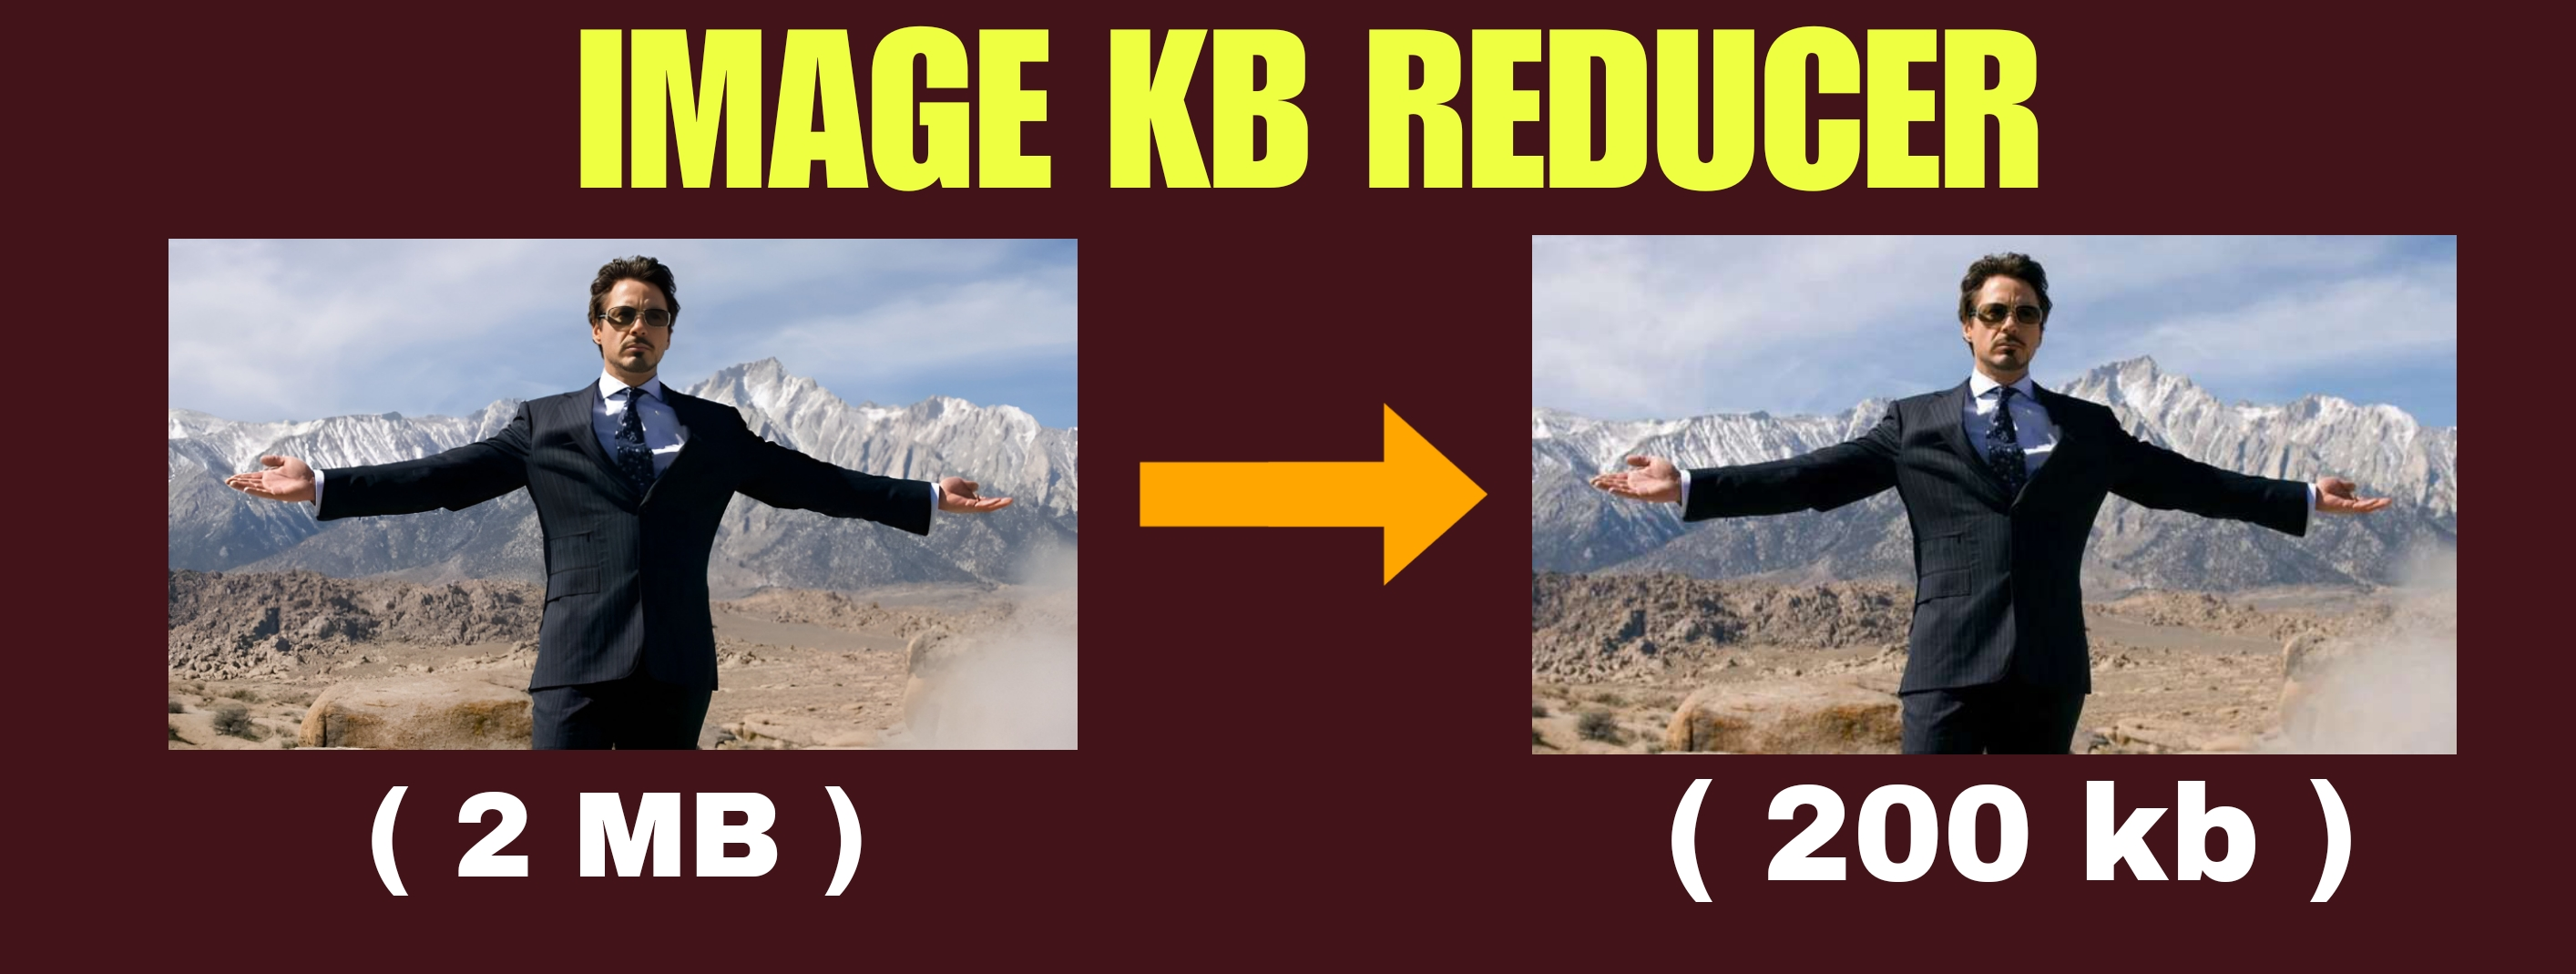

<div style="border: 2px solid #2e3b4e; border-radius: 15px; padding: 15px; font-family: Arial, sans-serif; background-color: #FFFFE0; color: #2e3b4e;">
  <h3>Explanation of Pillow Library and ImageOps</h3>
  <ol>
    <li><b>Pillow Library:</b> The <code>Pillow</code> library is a modern fork of the Python Imaging Library (<code>PIL</code>). It provides tools for opening, manipulating, and saving images in many different formats.</li>
    <li><b>ImageOps Module:</b> The <code>ImageOps</code> module in Pillow provides various image processing functions, such as adjusting brightness, contrast, or applying effects like mirror, invert, and more.</li>
    <li><b>Image Manipulation:</b> The <code>ImageOps</code> module also includes utilities for modifying images in simpler ways, such as adding padding, resizing, or flipping images.</li>
    <li><b>Key Functions:</b> Key functions in <code>ImageOps</code> include <code>invert()</code>, <code>expand()</code>, <code>fit()</code>, and <code>solarize()</code>, among others, which help in applying various transformations to images.</li>
  </ol>
</div>


In [47]:
from PIL import Image, ImageOps                   # Image Manipulation ,PIL for pillow library
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt         # Visualization

<div style="border: 2px solid #2e3b4e; border-radius: 15px; padding: 15px; font-family: Arial, sans-serif; background-color: #FFFFE0; color: #2e3b4e;">
  <h3>Image Loading and Information Extraction</h3>
  <ol>
    <li><b>Image Loading:</b> The image is loaded using <code>PIL.Image.open()</code> by specifying the file path.</li>
    <li><b>Displaying the Image:</b> The image is displayed with <code>matplotlib.pyplot.imshow()</code>, and the axis is turned off using <code>plt.axis('off')</code> for a cleaner view.</li>
    <li><b>Image Shape:</b> The dimensions (width x height) of the image are obtained using <code>image.size</code>, which returns a tuple with the width and height.</li>
    <li><b>File Size:</b> The file size is calculated using <code>os.path.getsize()</code> and is converted from bytes to kilobytes (KB).</li>
  </ol>
</div>


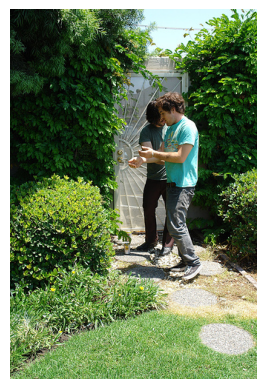

Image Shape: 333 x 500 pixels
Image File Size: 213.03 KB


In [48]:
# Path to the image
image_path = '/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/1000092795.jpg'

image = Image.open(image_path)

plt.imshow(image)
plt.axis('off') 
plt.show()

image_shape = image.size  # Returns a tuple (width, height)
print(f"Image Shape: {image_shape[0]} x {image_shape[1]} pixels")

file_size_kb = os.path.getsize(image_path) / 1024  # Convert bytes to KB
print(f"Image File Size: {file_size_kb:.2f} KB")


<div style="border: 2px solid #2e3b4e; border-radius: 15px; padding: 15px; font-family: Arial, sans-serif; background-color: #FFFFE0; color: #2e3b4e;">
  <h3>Image Size Reduction Function</h3>
  <ol>
    <li><b>Open Image:</b> The image is opened using <code>PIL.Image.open()</code> from the specified <code>image_path</code>.</li>
    <li><b>Resize Image:</b> The image is resized to fit within the specified <code>max_size</code>, while maintaining the aspect ratio.</li>
    <li><b>Initial Compression:</b> The image is saved with an initial quality of 95% using <code>image.save()</code> in <code>JPEG</code> format.</li>
    <li><b>Check and Reduce File Size:</b> The file size is checked, and if it exceeds the target size (<code>target_size_kb</code>), the quality is reduced by 5% until the target size is met or quality falls below 10%.</li>
    <li><b>Save and Output:</b> The final reduced image is saved, and the file size is printed.</li>
  </ol>
</div>


In [51]:
def reduce_image_size(image_path, output_path, max_size=(800, 800), target_size_kb=100):
    """
    Reduces the size of an image by resizing and compressing it to a specific target file size.
    
    Args:
        image_path (str): Path to the input image.
        output_path (str): Path to save the reduced image.
        max_size (tuple): Maximum width and height for resizing.
        target_size_kb (int): Target size for the output image in KB.
    """
    try:
        # Open the image
        image = Image.open(image_path)

        # Resize the image while maintaining aspect ratio
        image.thumbnail(max_size)

        # Set initial quality value
        quality = 95

        # Save the image with initial quality
        image.save(output_path, "JPEG", quality=quality)

        # Check the file size and adjust quality until we reach the target size
        file_size_kb = os.path.getsize(output_path) / 1024  # Convert bytes to KB

        # Gradually reduce quality if the file size is larger than target
        while file_size_kb > target_size_kb and quality > 10:
            quality -= 5  # Reduce quality by 5%
            image.save(output_path, "JPEG", quality=quality)
            file_size_kb = os.path.getsize(output_path) / 1024  # Update file size

        print(f"Image saved at: {output_path}")
        print(f"Final file size: {file_size_kb:.2f} KB")

    except Exception as e:
        print(f"Error: {e}")

In [52]:
# Example usage
if __name__ == "__main__":
    # Input and output paths
    input_path = '/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/1000092795.jpg'
    output_path = 'Arborio_reduced.jpg'

    # Specify the target file size (in KB)
    target_size_kb = 50  # You can set this to any value, like 100 KB, 400 KB ,100kb .. anything, etc.

    # Reduce the image size
    reduce_image_size(
        image_path=input_path,
        output_path=output_path,
        max_size=(800, 800),  # Resize to fit within 800x800 pixels
        target_size_kb=target_size_kb  # Target file size in KB
    )


Image saved at: Arborio_reduced.jpg
Final file size: 47.79 KB


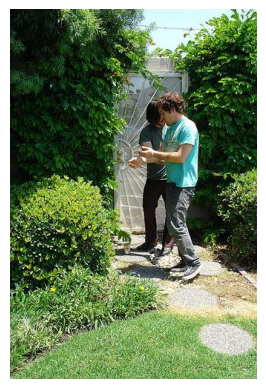

Image Dimensions: 333 x 500 pixels
Image File Size: 47.79 KB


In [50]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the reduced image
output_image = 'Arborio_reduced.jpg'

# Open the image
image = Image.open(output_image)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off the axis
plt.show()

# Check image dimensions (size in pixels)
image_size = image.size  # This returns a tuple (width, height)
print(f"Image Dimensions: {image_size[0]} x {image_size[1]} pixels")

# Check image file size (in KB)
file_size_kb = os.path.getsize(output_image) / 1024  # Convert bytes to KB
print(f"Image File Size: {file_size_kb:.2f} KB")


# Converted 213 to 47 kb as you wnat : Good thing is it Maintain Quality 
# If It help full then upvote it 🤪🤪🤪🤪